In [1]:
import matplotlib.pyplot as plt
from time import time

from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA

import numpy as np

In [2]:
"""

'Labelled Faces in the Wild' dataset. 

"""


ldw_people =  fetch_lfw_people()
# print(ldw_people['DESCR'])

In [3]:
ldw_people.images.shape

(13233, 62, 47)

In [4]:
X = np.vstack([img.flatten() for img in ldw_people.images])
X.shape

(13233, 2914)

In [5]:
"""
SVD
"""
t0 = time()

U,S,V=np.linalg.svd(X,full_matrices=False)

print("SVD on %i pictures with %i pixels took %1.3f minutes" % (X.shape[0],X.shape[1],(time()-t0)/60))

SVD on 13233 pictures with 2914 pixels took 0.362 minutes


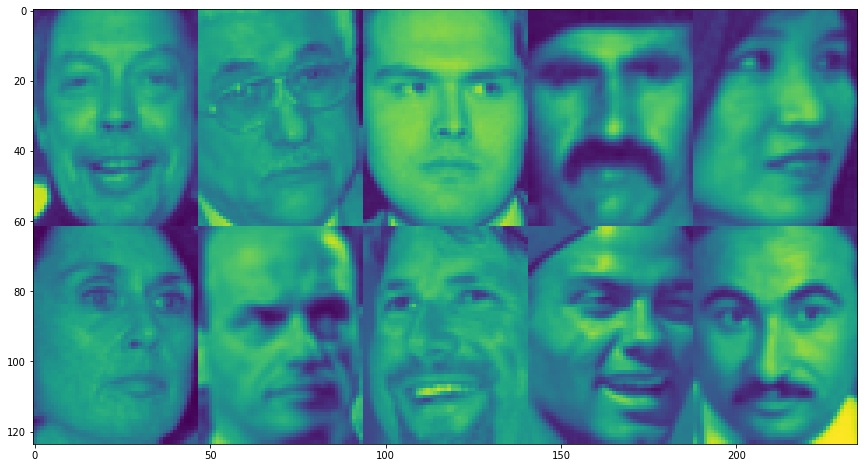

In [6]:
sample = np.vstack([np.hstack([X[i+5*j].reshape(62,47) for i in range(5)]) for j in range(2)])
plt.figure(figsize=(15,8))
plt.imshow(sample)
plt.savefig('img/svd_lfw_pics.png')

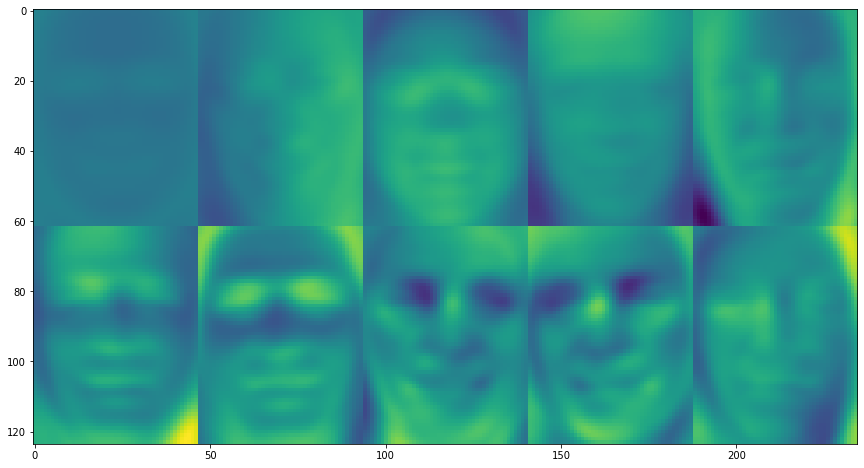

In [7]:
eigen = np.vstack([np.hstack([V[i+5*j].reshape(62,47) for i in range(5)]) for j in range(2)])
plt.figure(figsize=(15,8))
plt.imshow(eigen)
plt.savefig('img/svd_eigenfaces.png')

In [8]:
def get_filtered(N):
    #mask = np.hstack([np.ones([U.shape[0],N]),np.zeros([U.shape[0],U.shape[1]-N])])

    #Q = np.matmul(np.matmul(U*mask,np.diag(S)),V)
    Q = np.matmul(np.matmul(U[:100,:N],np.diag(S[:N])),V[:N])
    
    return Q

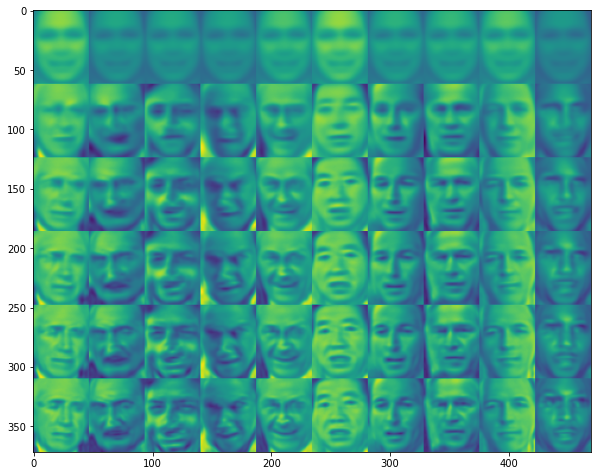

In [9]:
#sample = np.vstack([np.hstack([get_filtered(N)[i].reshape(62,47) for i in range(5)]) for N in [1,100,200,500]])
sample = np.vstack([np.hstack([get_filtered(N)[i+50].reshape(62,47) for i in range(10)]) for N in range(1,300)[::50]])
                   
plt.figure(figsize=(10,20))
plt.imshow(sample,aspect='equal')
plt.savefig('img/svd_lfw_pics_filtered.png', bbox_inches='tight')

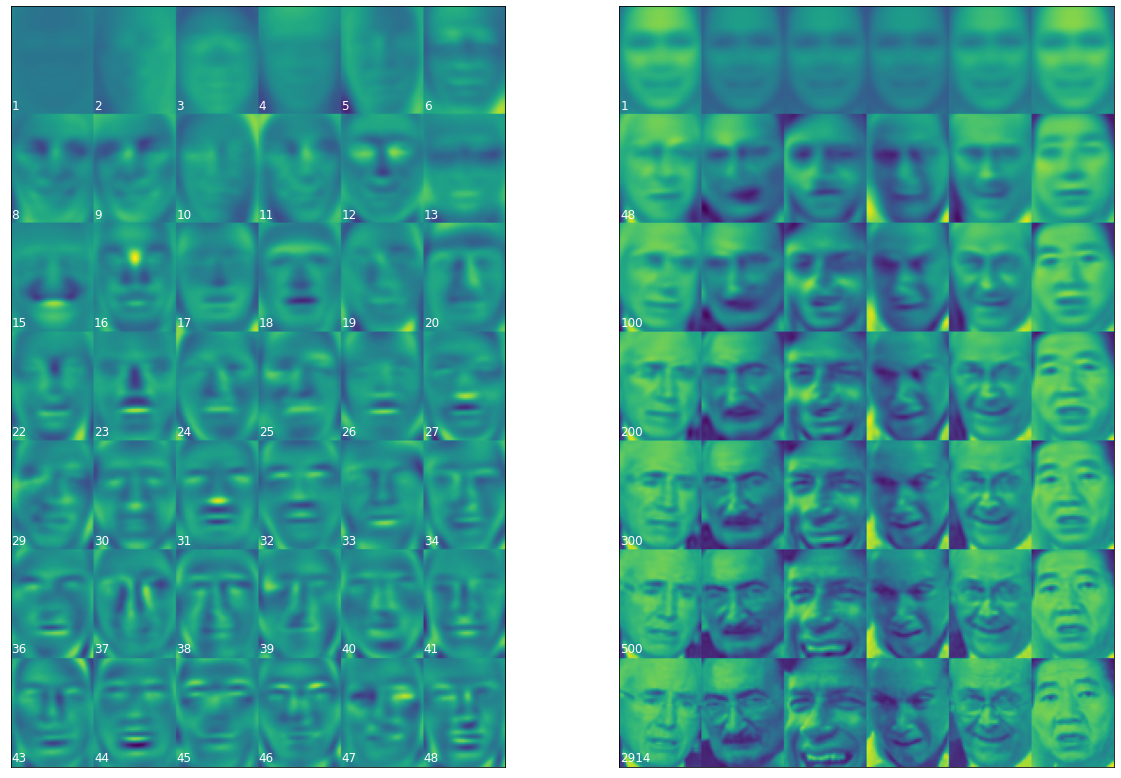

In [10]:
fig,ax = plt.subplots(1,2,figsize=(20,14))

for a in ax:
    a.axes.get_xaxis().set_visible(False)
    a.axes.get_yaxis().set_visible(False)

eigen = np.vstack([np.hstack([V[i+7*j].reshape(62,47) for i in range(6)]) for j in range(7)])
ax[0].imshow(eigen,aspect='equal')
[[ax[0].text(x=47*i,y=62*j+58,s=str(1+i+7*j),color='white',fontsize=12) for i in range(6)] for j in range(7)]


    
    
sample = np.vstack([np.hstack([get_filtered(N)[i+50].reshape(62,47) for i in range(6)]) for N in [1,48,100,200,300,500,2914]])

ax[1].imshow(sample,aspect='equal')
N = [1,48,100,200,300,500,2914]
[ax[1].text(x=0,y=62*j+58,s=str(N[j]),color='white',fontsize=12) for j in range(7)]


plt.savefig('img/svd_eigenfaces.png', bbox_inches='tight')

In [11]:
U.shape

(13233, 2914)

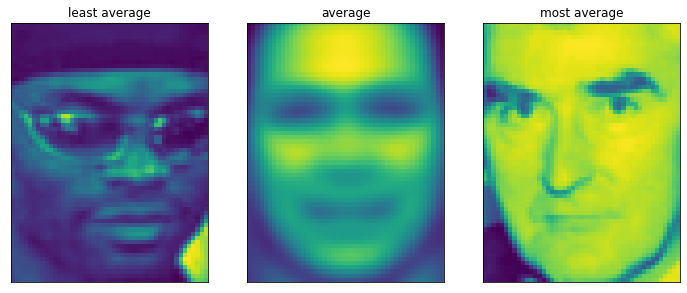

In [12]:
def l2(x):
    if len(x.shape) == 1:
        return np.sqrt(np.sum([i**2 for i in x]))
    else:
        return np.sqrt(np.sum([i**2 for i in x.T],axis=0)).T


def average_face(U,S,V):
    x_s = np.mean(U,axis=0)

    return np.matmul((np.matmul(x_s,np.diag(S))),V).reshape(62,47)
    
def median_face(U,S,V):
    x_s = np.median(U,axis=0)
    
    return np.matmul((np.matmul(x_s,np.diag(S))),V).reshape(62,47)

def most_average(U,S,V):
    
    x_s = np.mean(U,axis=0)
    q_s = np.matmul(x_s,np.diag(S)) # weighted average face
    
    Q = np.matmul(U,np.diag(S)) # weighted eigenfaces
    
    #score = [l2(x) for x in (Q-q_s)] # euclidian
    score = np.matmul(Q,q_s) # cosine distance
    
    f_most = np.matmul(Q[score == np.max(score)],V).reshape(62,47)
    f_least = np.matmul(Q[score == np.min(score)],V).reshape(62,47)
    
    return f_least,f_most


f_least,f_most = most_average(U,S,V)

fig,ax = plt.subplots(1,3,figsize=(12,5))
ax[0].imshow(f_least)
ax[0].set_title('least average')
ax[1].imshow(average_face(U,S,V))
ax[1].set_title('average')
ax[2].imshow(f_most)
ax[2].set_title('most average')

for a in ax:
    a.axes.get_xaxis().set_visible(False)
    a.axes.get_yaxis().set_visible(False)
